In [2]:
!pip install opendatasets --quiet

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import os
import opendatasets as od

In [4]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
od.download("https://www.kaggle.com/c/rossmann-store-sales")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aryanpatil171121
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 949MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [6]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'train.csv', 'store.csv', 'test.csv']

In [7]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv' ,  low_memory= False)
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
store_df = pd.read_csv('rossmann-store-sales/store.csv' ,  low_memory= False)
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [10]:
merged_df = ross_df.merge(store_df ,  how = 'left' ,  on = "Store")
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
merged_test_df = test_df.merge(store_df , how = 'left', on = 'Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
merged_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [14]:
merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [15]:
merged_df["Date"] = pd.to_datetime(merged_df['Date'])
merged_test_df["Date"] = pd.to_datetime(merged_test_df['Date'])

<Axes: >

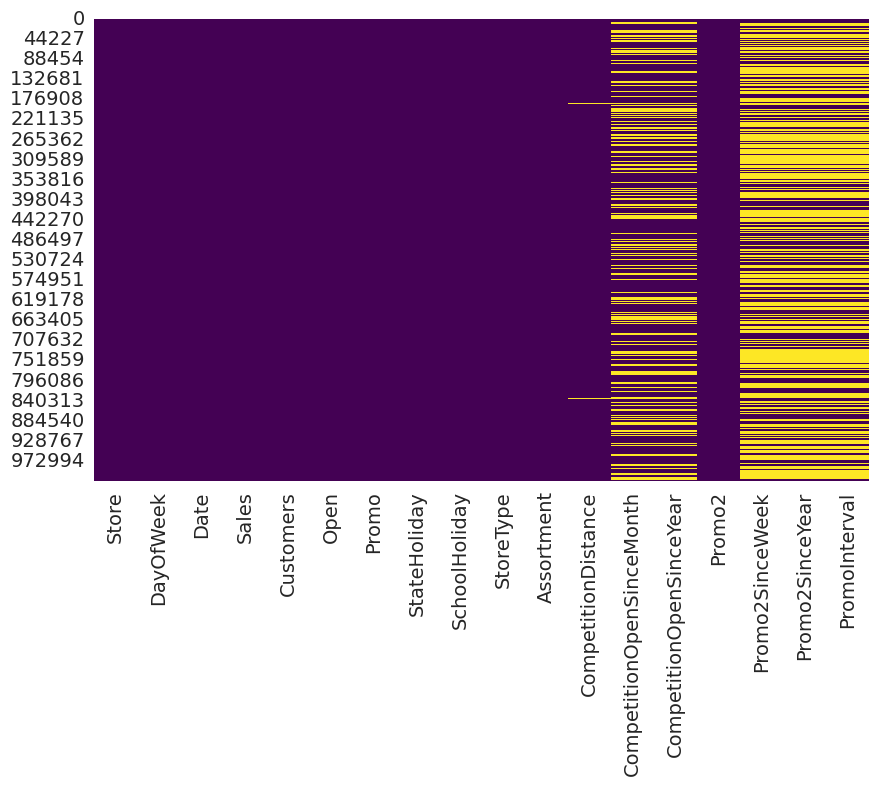

In [16]:
sns.heatmap( data = merged_df.isnull(), cmap = 'viridis' , cbar = False)

In [17]:
numeric_cols = merged_df.select_dtypes(include= np.number).columns.to_list()
numeric_cols.remove("Customers")
numeric_cols.remove("Store")

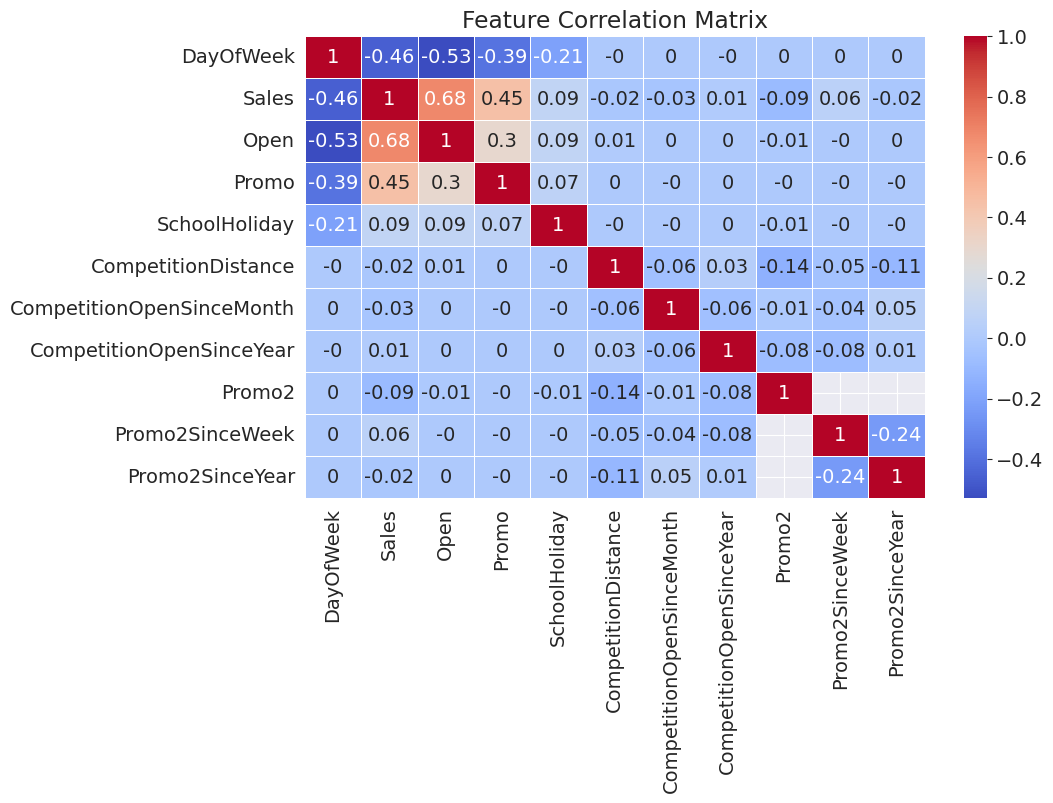

In [18]:
#  Compute Correlation Matrix (Only Numerical)
correlation_matrix = merged_df[numeric_cols].corr().round(2)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
numeric_cols.remove("Sales")
# as all corr are weak will use mean to impute
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer( strategy = 'mean')
imputer.fit(merged_df[numeric_cols])
merged_df [ numeric_cols]= imputer.transform(merged_df[numeric_cols])
merged_test_df[numeric_cols]  = imputer.transform(merged_test_df[numeric_cols])

In [20]:
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [21]:
merged_test_df.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [22]:
imputer2 = SimpleImputer(strategy = "most_frequent")
imputer2.fit(merged_df[["PromoInterval"]])
merged_df[["PromoInterval"]] = imputer2.transform(merged_df[["PromoInterval"]])
merged_test_df[["PromoInterval"]] = imputer2.transform(merged_test_df[["PromoInterval"]])

In [23]:
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


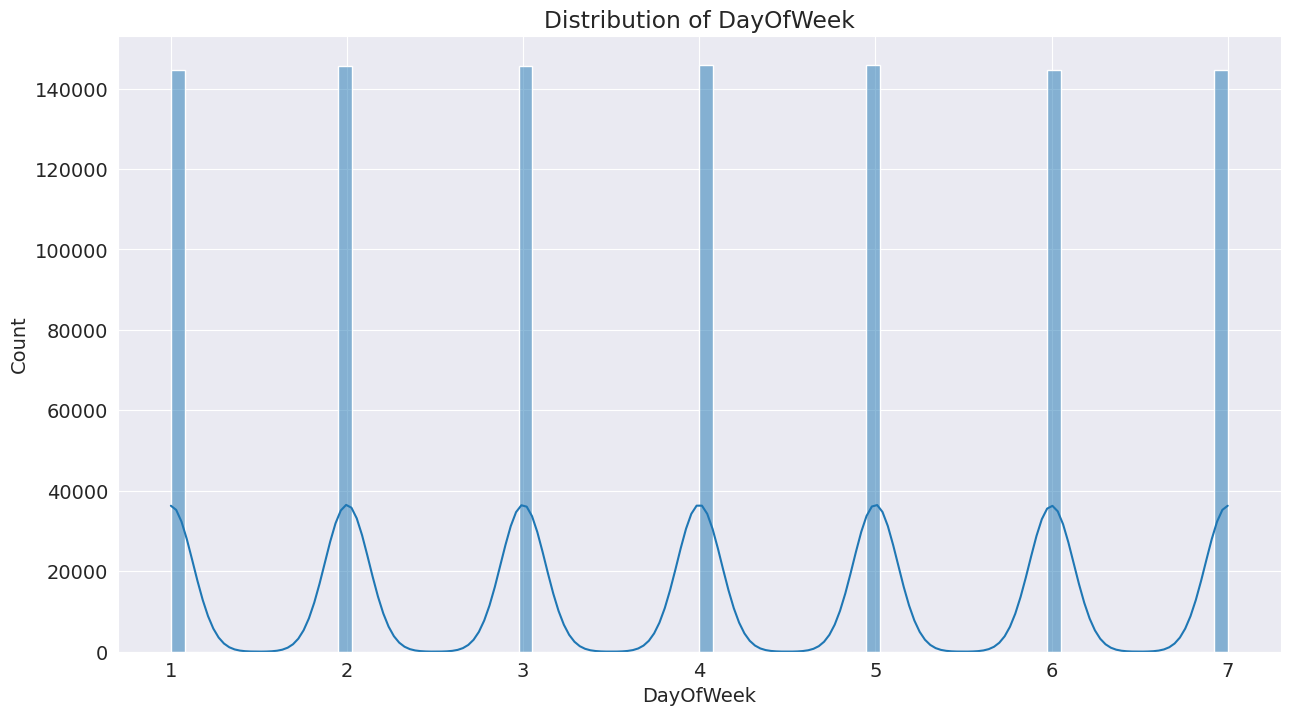

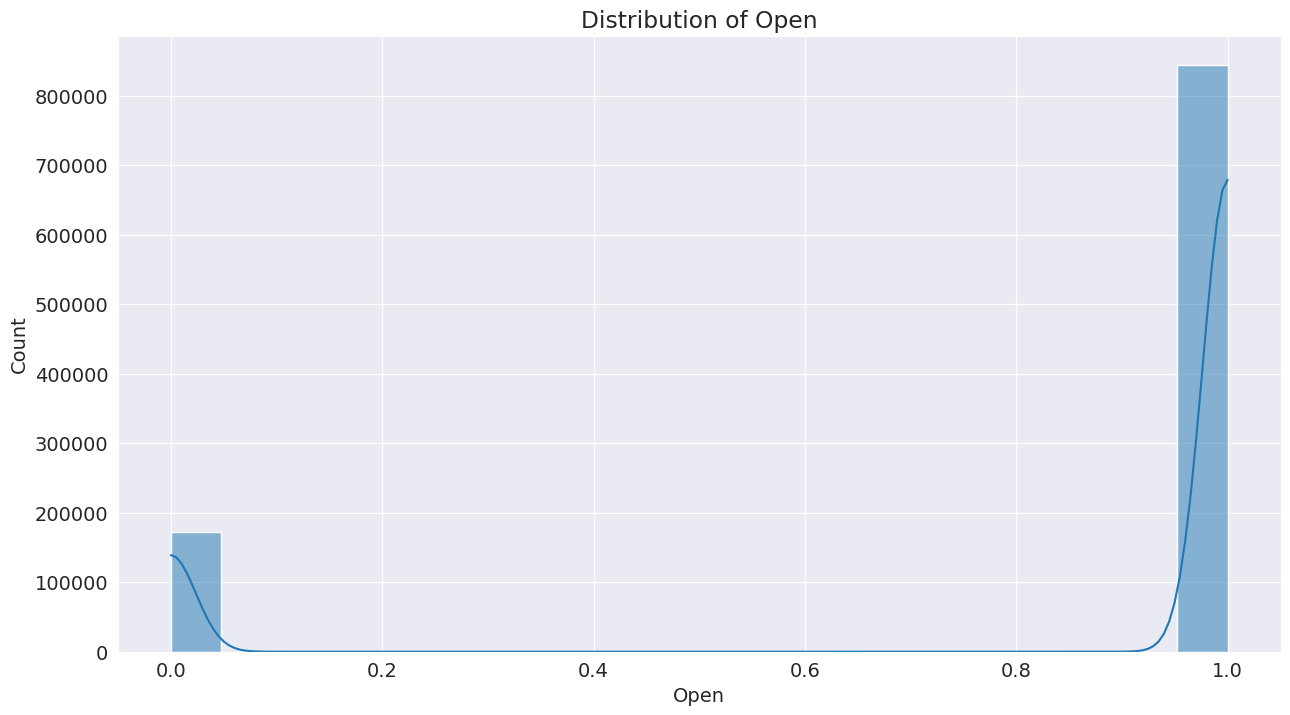

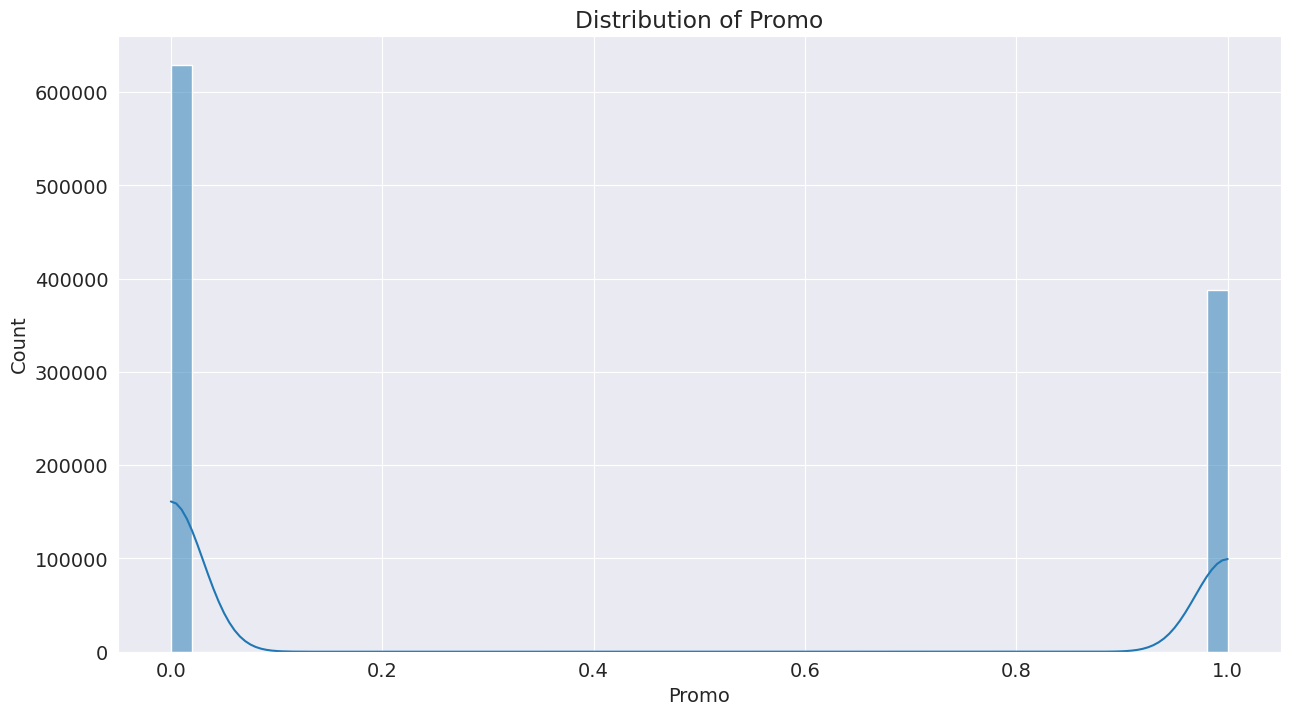

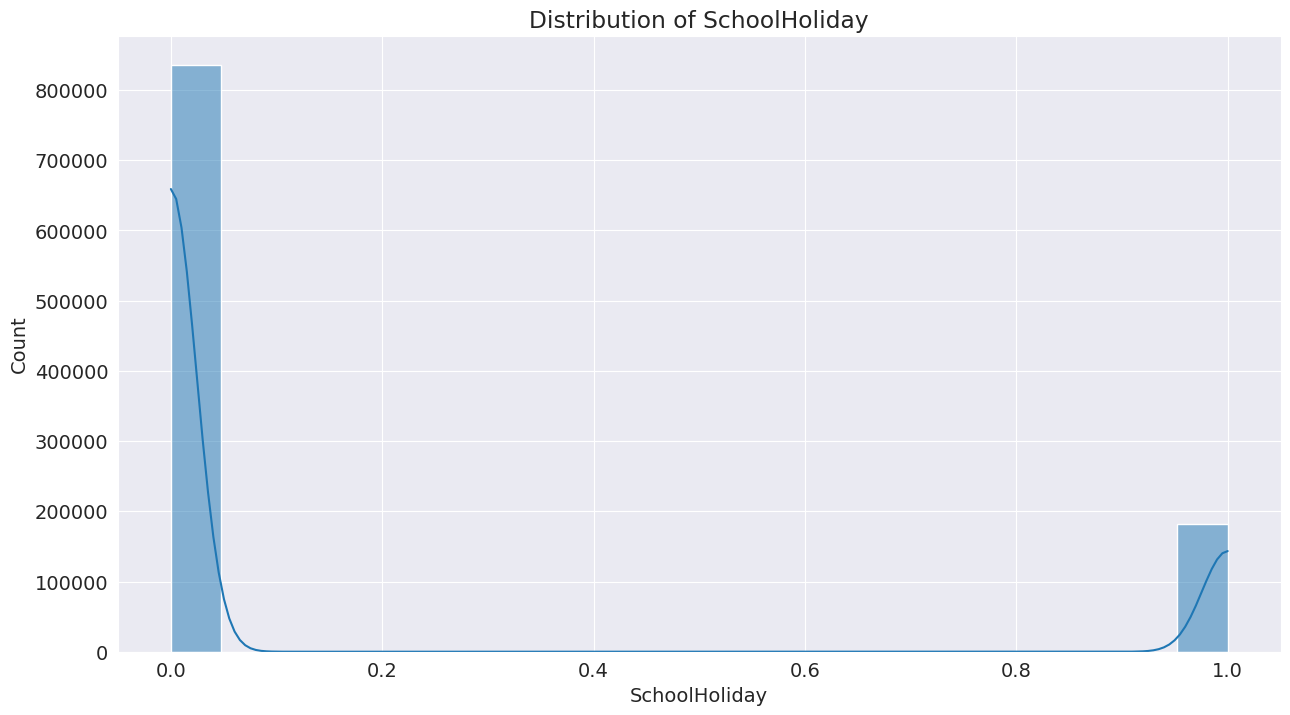

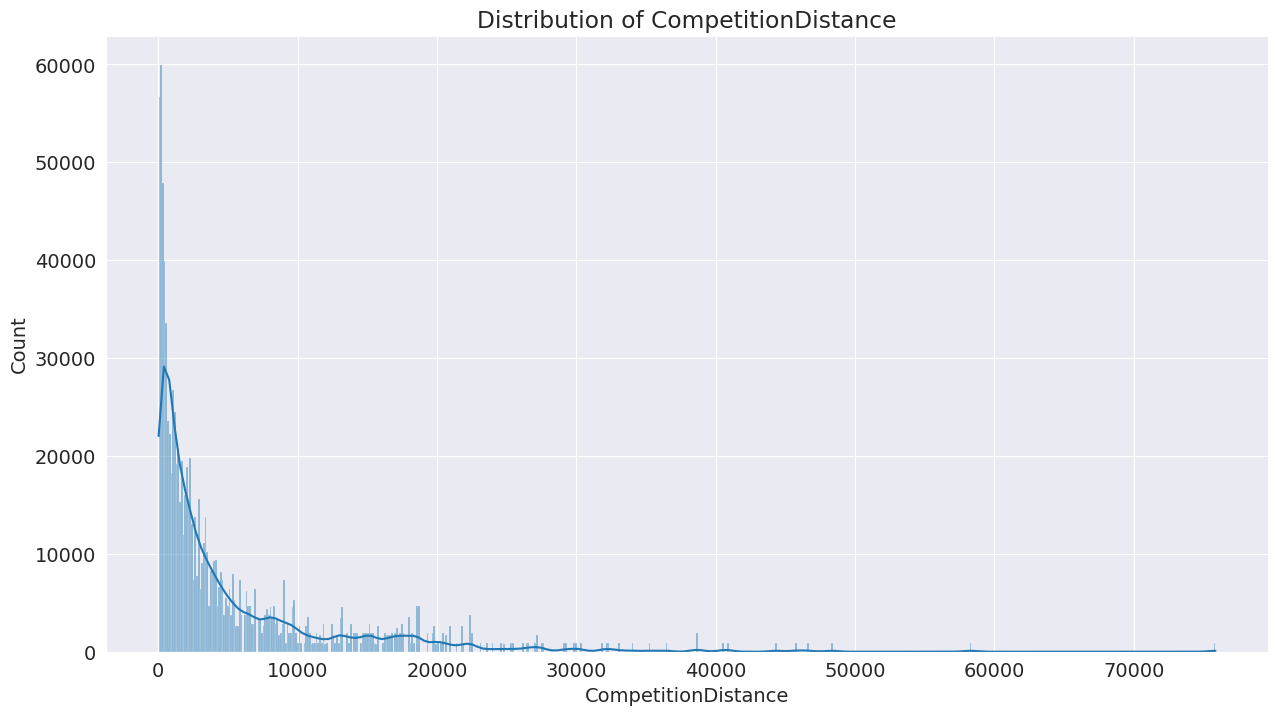

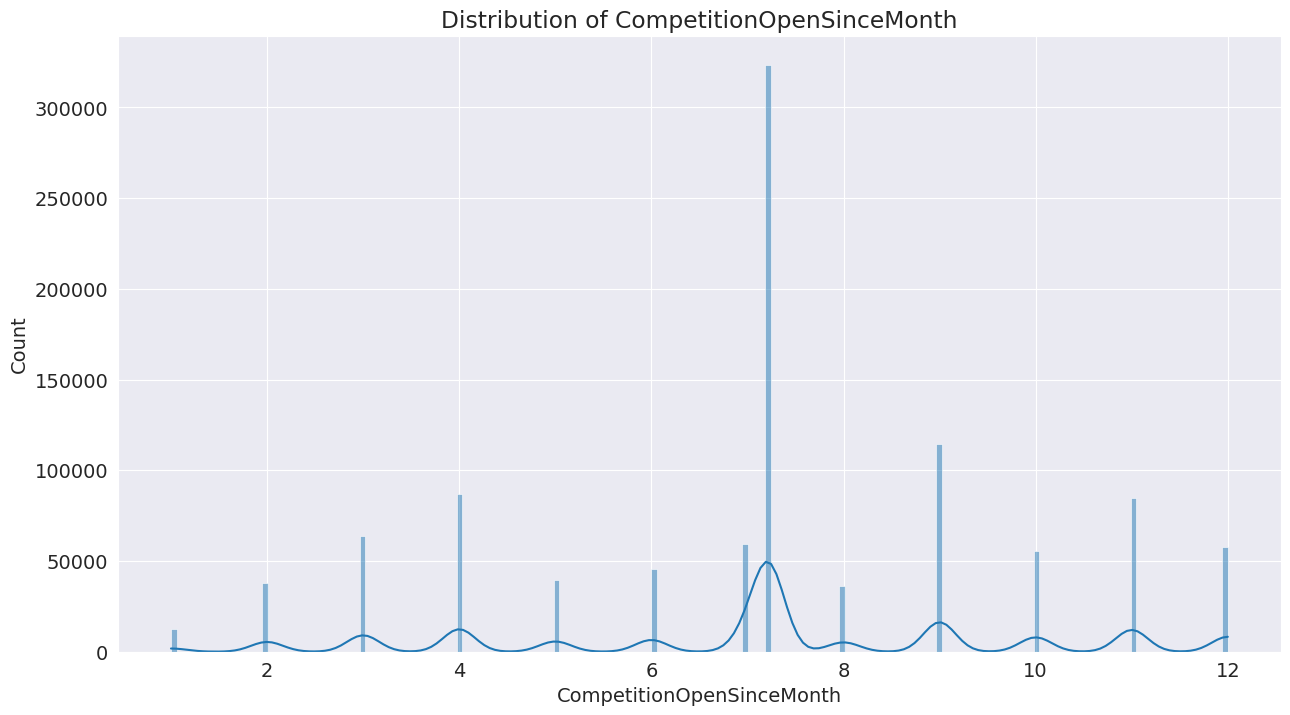

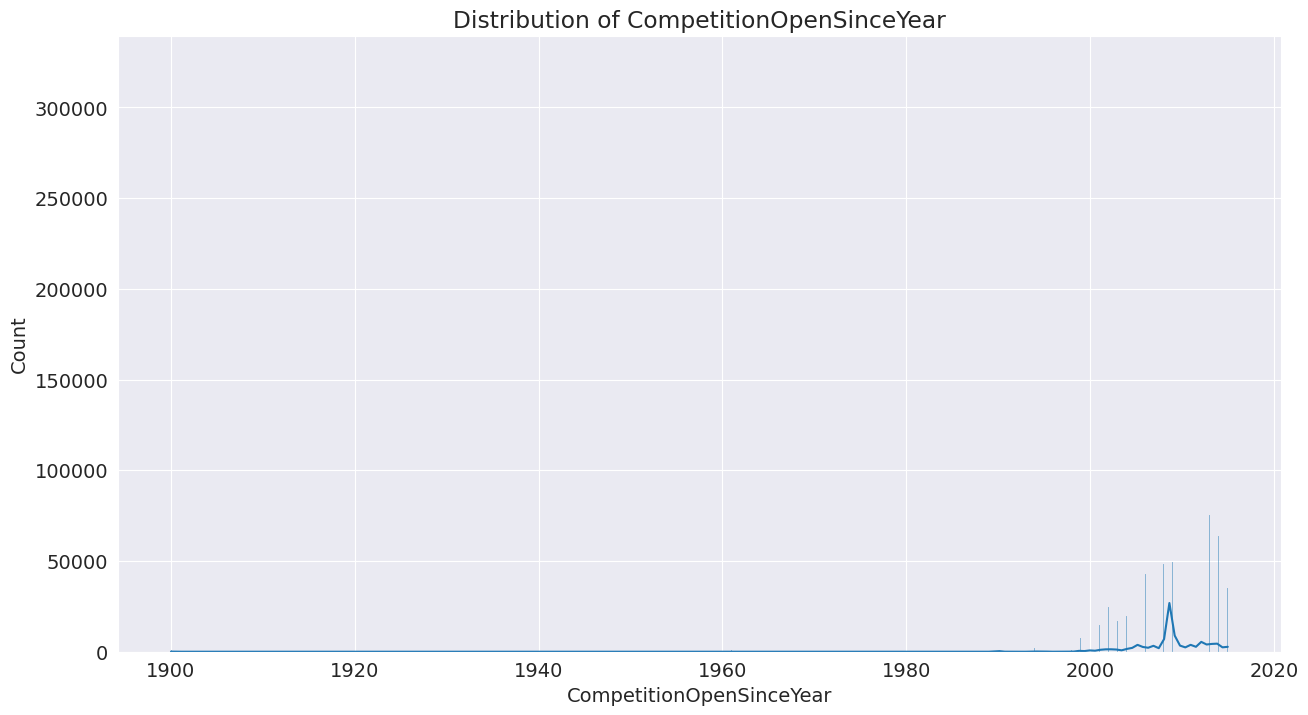

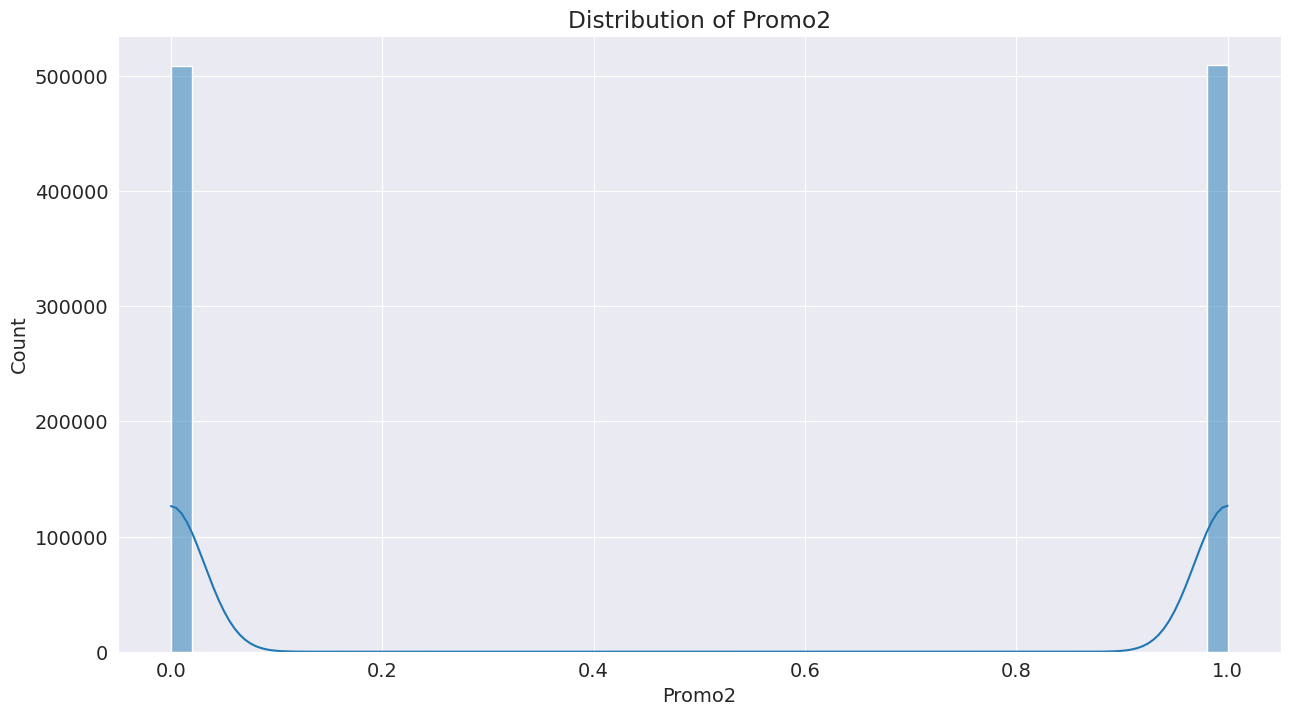

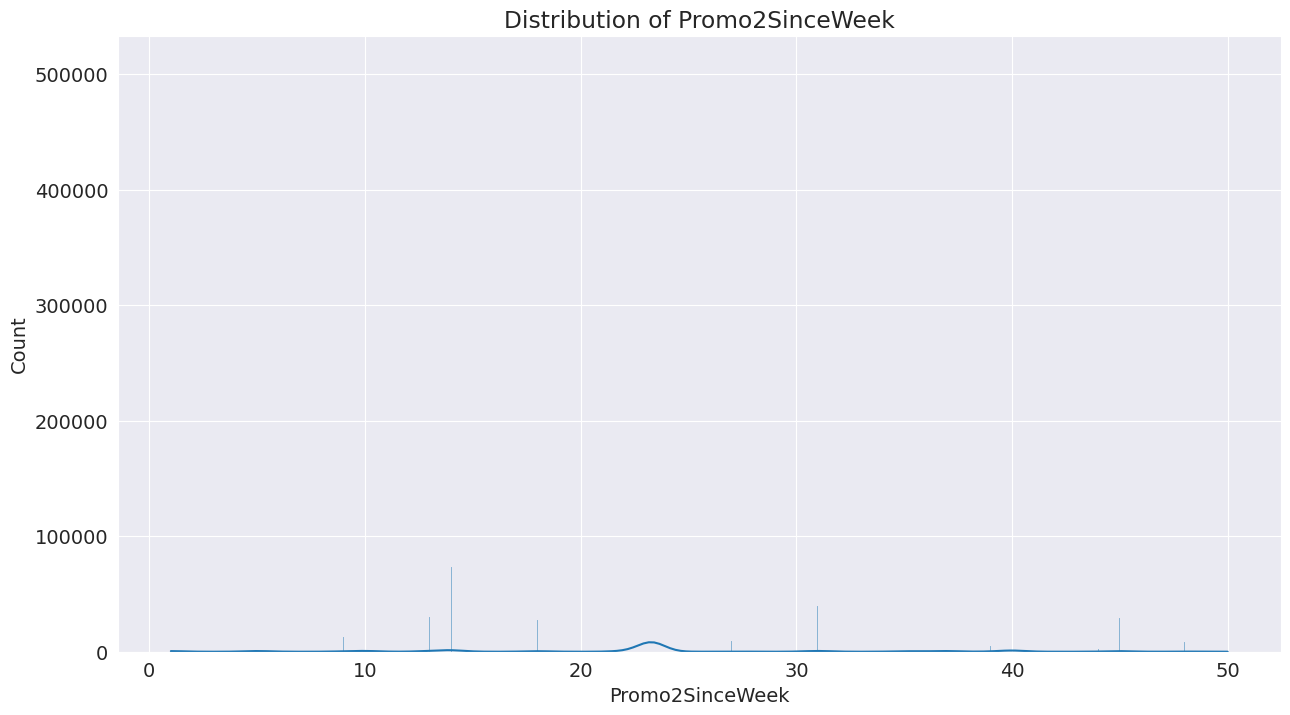

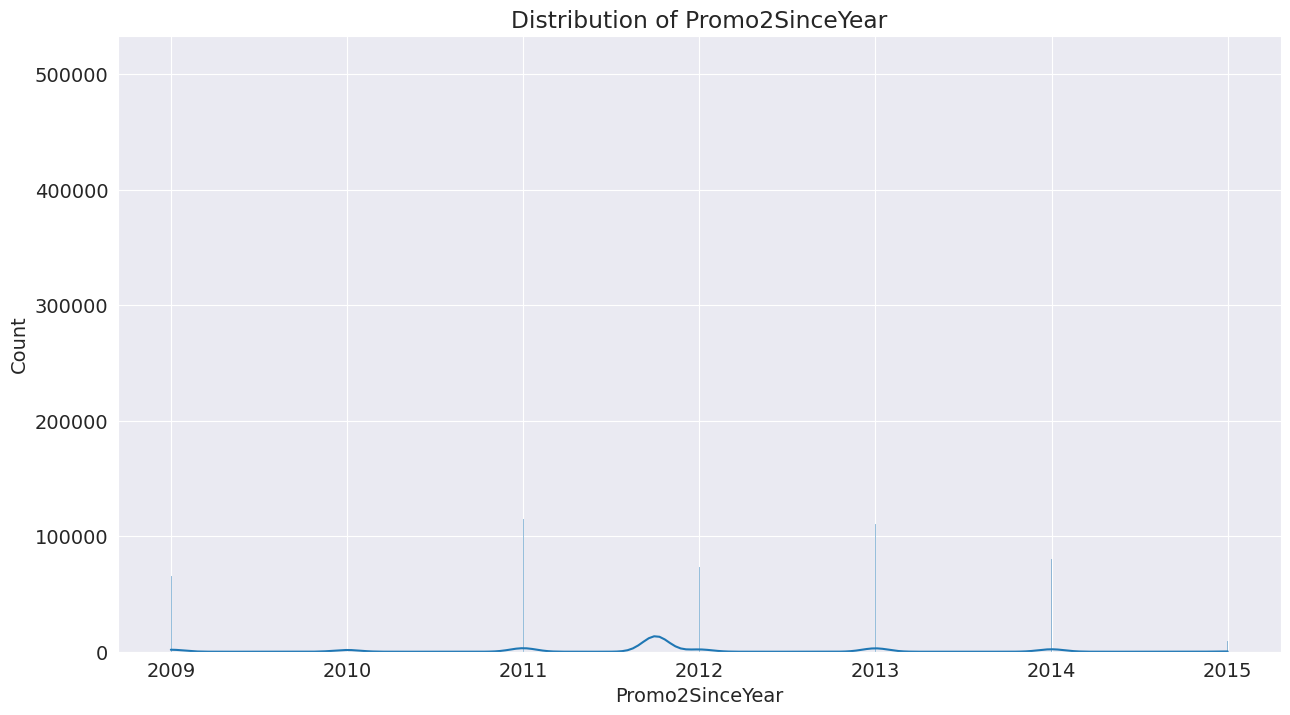

In [24]:
for col in numeric_cols:
  plt.figure(figsize = (15,8))
  sns.histplot(merged_df[col], kde = True)
  plt.title(f"Distribution of {col}")
  plt.show()
  print()

In [25]:
from scipy.stats import skew ,  kurtosis
for col in numeric_cols:
  print(f"{col}: Skewness = {skew(merged_df[col])}, Kurtosis = {kurtosis(merged_df[col])}")
  print()

DayOfWeek: Skewness = 0.001592820455386349, Kurtosis = -1.2468731088515335

Open: Skewness = -1.7580419538619494, Kurtosis = 1.0907115115387436

Promo: Skewness = 0.48783712884720254, Kurtosis = -1.7620149357181183

SchoolHoliday: Skewness = 1.6778391651304974, Kurtosis = 0.8151442640458009

CompetitionDistance: Skewness = 2.932340251737522, Kurtosis = 13.041617318531433

CompetitionOpenSinceMonth: Skewness = -0.20566633948589635, Kurtosis = -0.4320687538762229

CompetitionOpenSinceYear: Skewness = -9.12875017344948, Kurtosis = 180.1545125535449

Promo2: Skewness = -0.0022551918616316776, Kurtosis = -1.9999949141096656

Promo2SinceWeek: Skewness = 0.14774053226378847, Kurtosis = 0.2564741430883575

Promo2SinceYear: Skewness = -0.169694216088698, Kurtosis = 0.9142586116387248



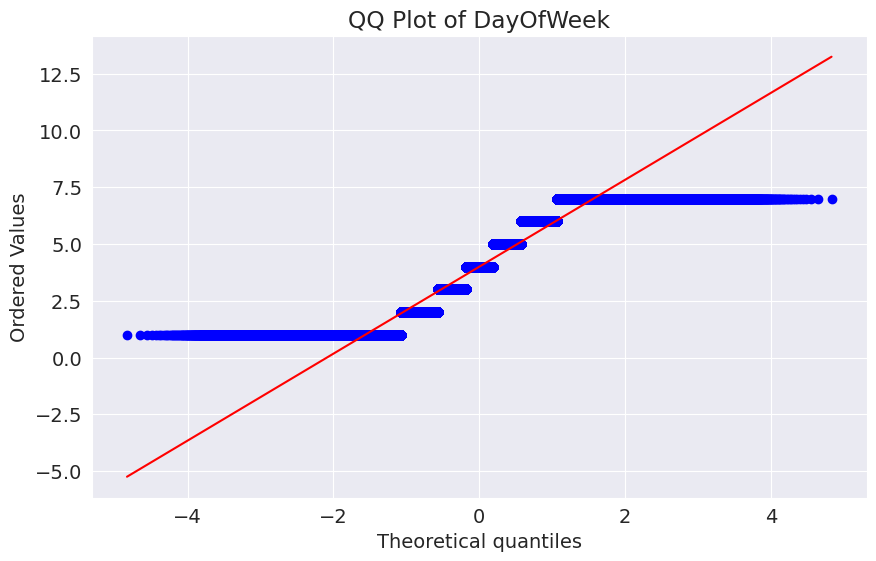

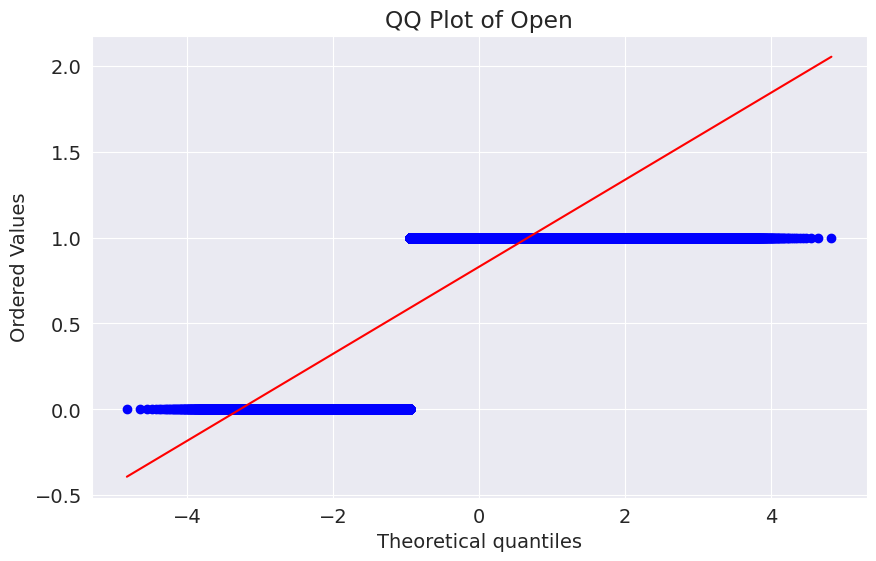

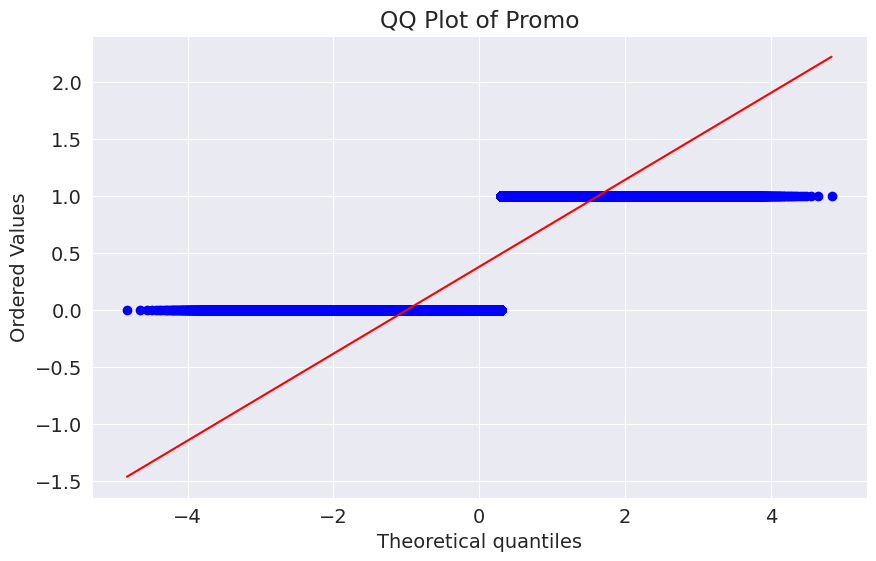

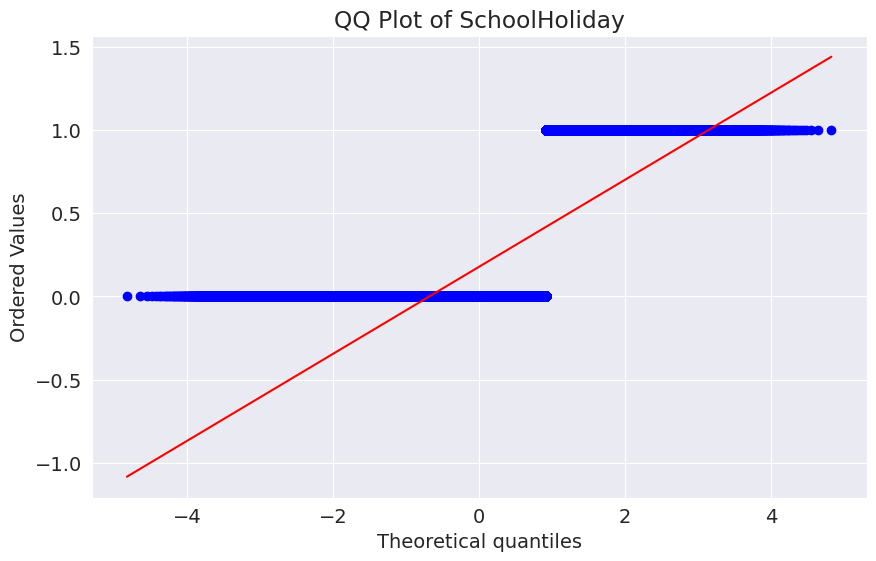

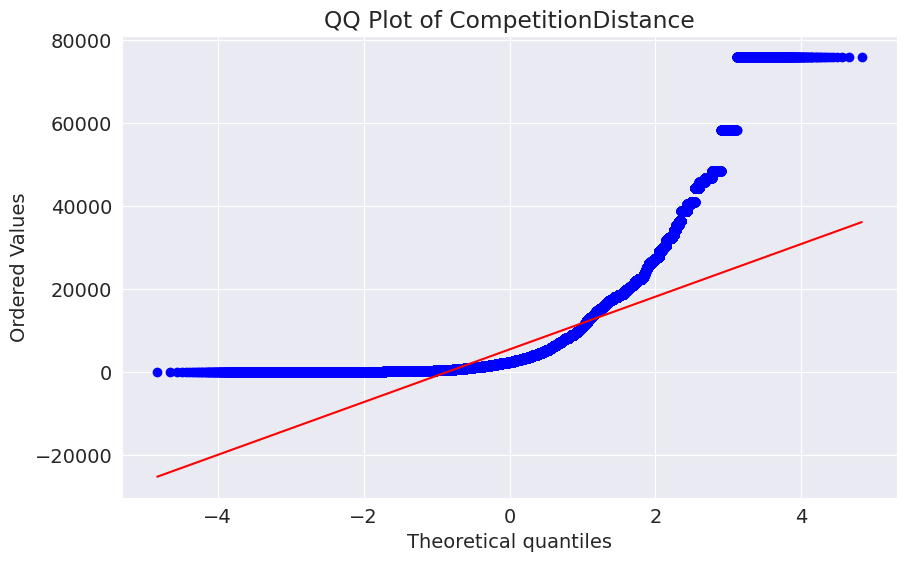

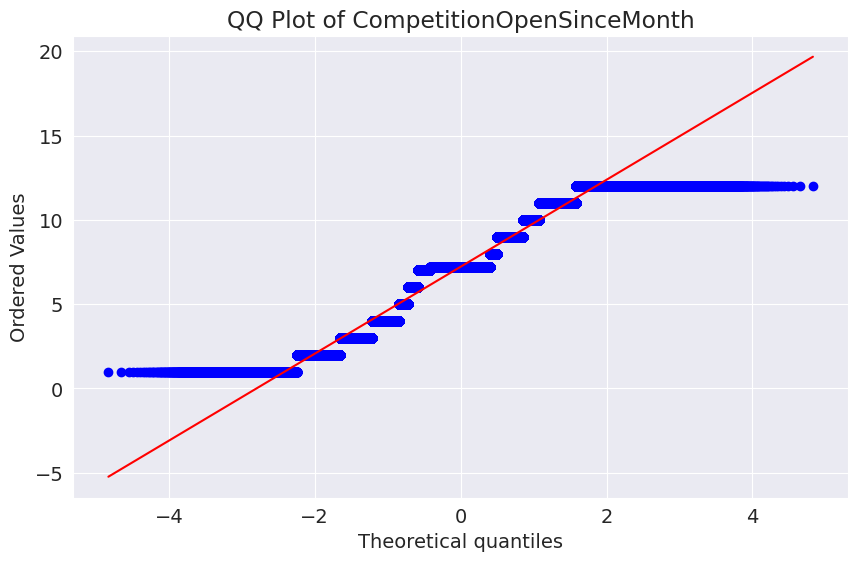

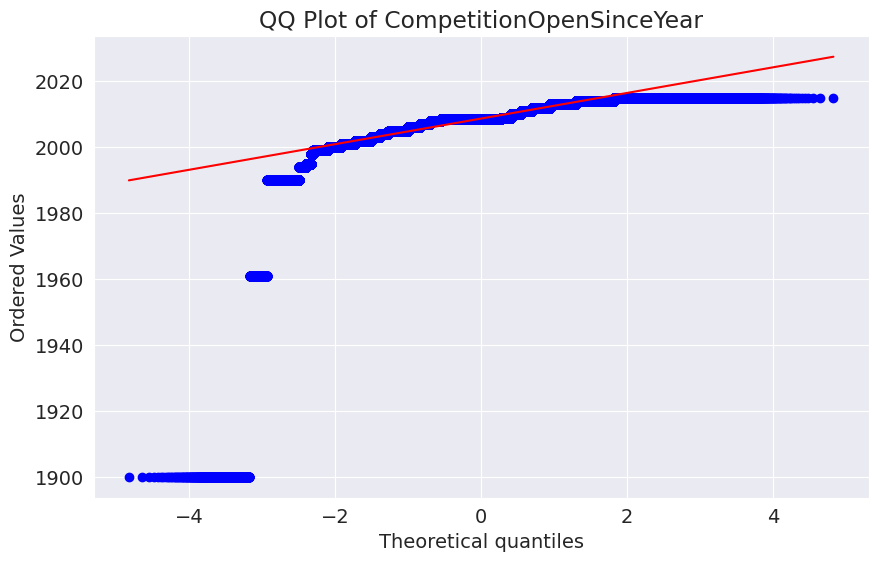

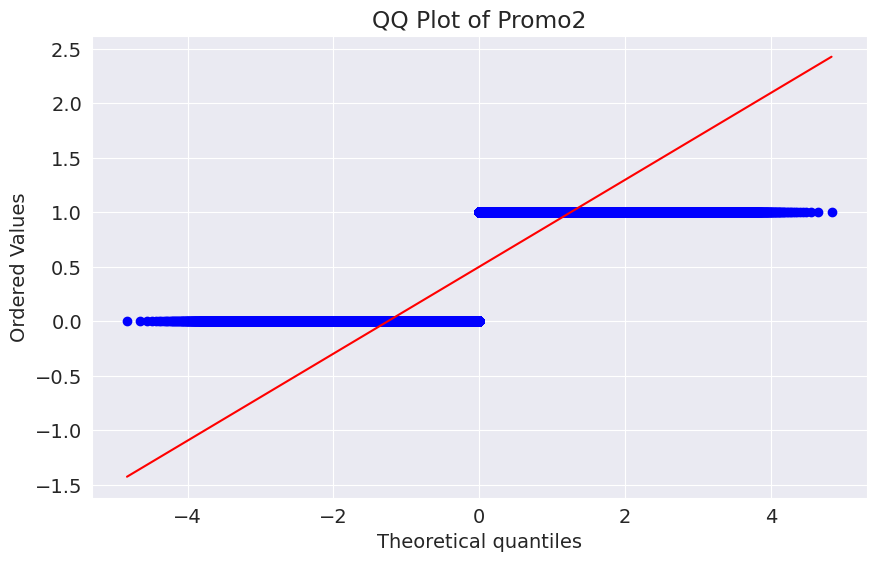

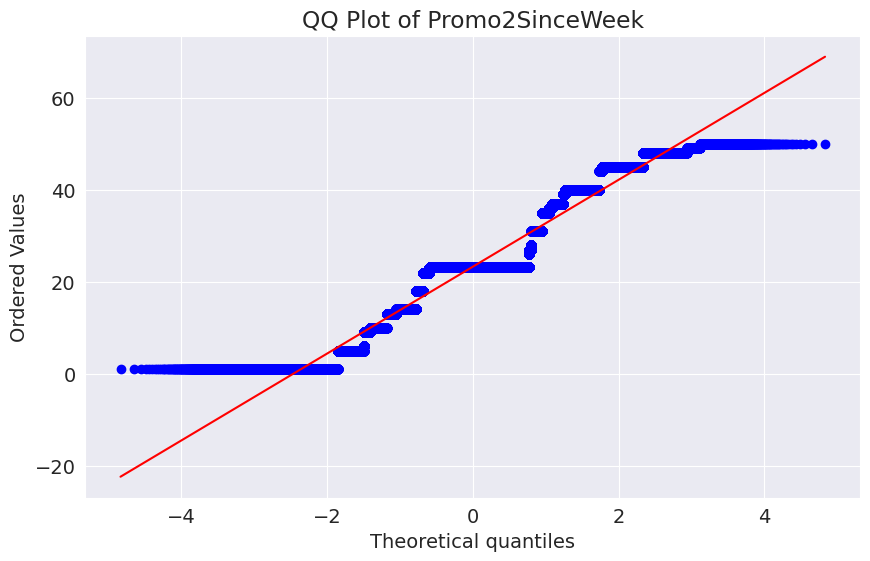

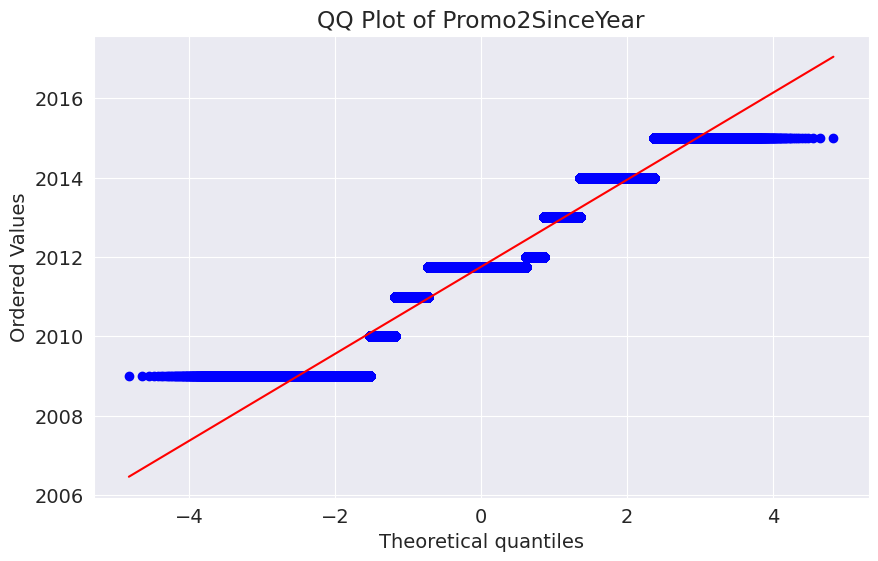

In [26]:
import scipy.stats as stats

for col in numeric_cols:
    stats.probplot(merged_df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")
    plt.show()
    print()

In [27]:
from sklearn.preprocessing import StandardScaler , PowerTransformer , MinMaxScaler , RobustScaler
scaler = {}
transformed_data = {}
for col in numeric_cols:
  skewness = skew(merged_df[col])

  if abs(skewness)  < 0.5:
    scaler[col] = StandardScaler()

  elif skewness > 0.5 :
    if (merged_df[col] > 0).all():  # Check if all values are positive
            scaler[col] = PowerTransformer(method='box-cox')
    else:
            scaler[col] = PowerTransformer(method='yeo-johnson')

  elif skewness < -0.5:
    scaler[col] = PowerTransformer(method = 'yeo-johnson')

  else :
    scaler[col] = RobustScaler()

  merged_df[col] = scaler[col].fit_transform(merged_df[[col]])
  merged_test_df[col] = scaler[col].transform(merged_test_df[[col]])

finalScaler = MinMaxScaler()

scaled_df = pd.DataFrame(finalScaler.fit_transform(merged_df[numeric_cols]),  columns = numeric_cols)
scaled_test_df = pd.DataFrame(finalScaler.transform(merged_test_df[numeric_cols]),  columns = numeric_cols)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [28]:
scaled_df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,1017209.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Open,1017209.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1017209.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
CompetitionOpenSinceMonth,1017209.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
CompetitionOpenSinceYear,1017209.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Promo2,1017209.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,1017209.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Promo2SinceYear,1017209.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
scaled_test_df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,41088.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Open,41088.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Promo,41088.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,41088.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
CompetitionDistance,41088.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
CompetitionOpenSinceMonth,41088.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
CompetitionOpenSinceYear,41088.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Promo2,41088.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,41088.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Promo2SinceYear,41088.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
cat_cols = merged_df.select_dtypes(include = "object").columns.to_list()
cat_cols

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [31]:
merged_df[cat_cols].nunique()

,0
StateHoliday,4
StoreType,4
Assortment,3
PromoInterval,3


In [32]:
merged_df['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc  = OneHotEncoder(sparse_output= False)
enc.fit(merged_df[cat_cols])
encoded_cols = enc.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(enc.transform(merged_df[cat_cols]), columns = encoded_cols)
encoded_test_df = pd.DataFrame(enc.transform(merged_test_df[cat_cols]), columns = encoded_cols)
encoded_df

,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017205,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1017206,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1017207,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [34]:
encoded_test_df

,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41084,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41085,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41086,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
final_df = pd.concat([scaled_df , encoded_df, merged_df[['Date', 'Store','Sales']] ],  axis = 1 )
final_test_df = pd.concat([scaled_test_df , encoded_test_df, merged_test_df[['Date', 'Store']] ],  axis = 1 )
final_df

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Date,Store,Sales
0,0.666667,1.0,1.0,1.0,0.401427,0.727273,0.840069,0.0,0.454471,0.458796,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-07-31,1,5263
1,0.666667,1.0,1.0,1.0,0.310371,0.909091,0.819223,1.0,0.244898,0.166667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-07-31,2,6064
2,0.666667,1.0,1.0,1.0,0.723965,1.000000,0.798845,1.0,0.265306,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-07-31,3,8314
3,0.666667,1.0,1.0,1.0,0.319586,0.727273,0.861393,0.0,0.454471,0.458796,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-07-31,4,13995
4,0.666667,1.0,1.0,1.0,0.841388,0.272727,1.000000,0.0,0.454471,0.458796,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-07-31,5,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0.166667,0.0,0.0,1.0,0.450062,0.454545,0.975572,1.0,0.612245,0.666667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2013-01-01,1111,0
1017205,0.166667,0.0,0.0,1.0,0.448759,0.272727,0.798845,0.0,0.454471,0.458796,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2013-01-01,1112,0
1017206,0.166667,0.0,0.0,1.0,0.661592,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2013-01-01,1113,0
1017207,0.166667,0.0,0.0,1.0,0.357517,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2013-01-01,1114,0


In [36]:
final_test_df

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Date,Store
0,0.500000,1.0,1.0,0.0,0.401427,0.727273,0.840069,0.0,0.454471,0.458796,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-09-17,1
1,0.500000,1.0,1.0,0.0,0.723965,1.000000,0.798845,1.0,0.265306,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-09-17,3
2,0.500000,1.0,1.0,0.0,0.805994,0.272727,0.951691,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-09-17,7
3,0.500000,1.0,1.0,0.0,0.631833,0.818182,0.975572,0.0,0.454471,0.458796,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-09-17,8
4,0.500000,1.0,1.0,0.0,0.458243,0.636364,0.685840,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-09-17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.833333,1.0,0.0,0.0,0.450062,0.454545,0.975572,1.0,0.612245,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-08-01,1111
41084,0.833333,1.0,0.0,0.0,0.448759,0.272727,0.798845,0.0,0.454471,0.458796,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-08-01,1112
41085,0.833333,1.0,0.0,0.0,0.661592,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-08-01,1113
41086,0.833333,1.0,0.0,0.0,0.357517,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-08-01,1114


In [37]:
print(final_df['Date'].min(), final_df['Date'].max())
print(final_test_df['Date'].min(), final_test_df['Date'].max())

2013-01-01 00:00:00 2015-07-31 00:00:00
2015-08-01 00:00:00 2015-09-17 00:00:00


<Axes: xlabel='Date', ylabel='Count'>

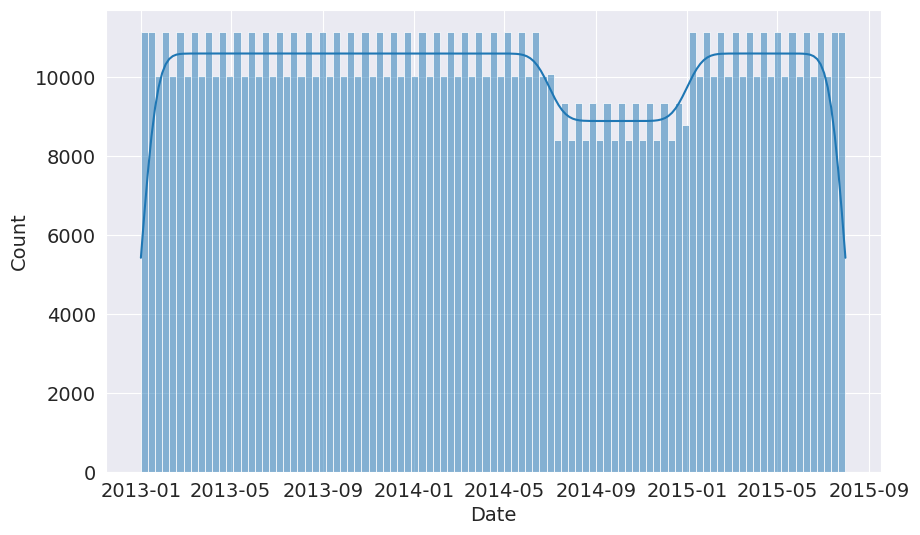

In [38]:
sns.histplot(final_df['Date'], kde = True)

In [39]:
trainSize = int(0.80 * len(final_df))
trainSize

813767

In [40]:
sorted_df = final_df.sort_values("Date")
train_df , val_df = sorted_df[:trainSize] , sorted_df[trainSize:]
train_df

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Date,Store,Sales
1017208,0.166667,0.0,0.0,1.0,0.584478,0.565715,0.854735,1.0,0.428571,0.500000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2013-01-01,1115,0
1016473,0.166667,0.0,0.0,1.0,0.614124,0.565715,0.854735,0.0,0.454471,0.458796,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2013-01-01,379,0
1016472,0.166667,0.0,0.0,1.0,0.464805,0.636364,0.928344,0.0,0.454471,0.458796,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2013-01-01,378,0
1016471,0.166667,0.0,0.0,1.0,0.136118,0.454545,0.883206,1.0,0.346939,0.166667,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2013-01-01,377,0
1016470,0.166667,0.0,0.0,1.0,0.180209,0.636364,0.928344,0.0,0.454471,0.458796,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2013-01-01,376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203899,0.666667,1.0,1.0,0.0,0.362648,1.000000,0.975572,1.0,0.734694,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-01-30,970,3952
203898,0.666667,1.0,1.0,0.0,0.315983,0.909091,0.668461,1.0,0.183673,0.666667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-01-30,969,3883
203897,0.666667,1.0,1.0,0.0,0.393755,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-01-30,968,8711
203896,0.666667,1.0,1.0,0.0,0.529913,0.727273,0.951691,1.0,0.714286,0.666667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-01-30,967,9196


In [41]:
print(len(train_df),len(val_df))

813767 203442


In [42]:
X_train = train_df.drop(columns = ['Sales','Date'])
X_val = val_df.drop(columns = ['Sales','Date'])

In [43]:
X_train

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Store
1017208,0.166667,0.0,0.0,1.0,0.584478,0.565715,0.854735,1.0,0.428571,0.500000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1115
1016473,0.166667,0.0,0.0,1.0,0.614124,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,379
1016472,0.166667,0.0,0.0,1.0,0.464805,0.636364,0.928344,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,378
1016471,0.166667,0.0,0.0,1.0,0.136118,0.454545,0.883206,1.0,0.346939,0.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,377
1016470,0.166667,0.0,0.0,1.0,0.180209,0.636364,0.928344,0.0,0.454471,0.458796,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203899,0.666667,1.0,1.0,0.0,0.362648,1.000000,0.975572,1.0,0.734694,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,970
203898,0.666667,1.0,1.0,0.0,0.315983,0.909091,0.668461,1.0,0.183673,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,969
203897,0.666667,1.0,1.0,0.0,0.393755,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,968
203896,0.666667,1.0,1.0,0.0,0.529913,0.727273,0.951691,1.0,0.714286,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,967


In [44]:
X_val

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Store
203894,0.666667,1.0,1.0,0.0,0.144892,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,965
203893,0.666667,1.0,1.0,0.0,0.231810,0.565715,0.854735,1.0,0.081633,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,964
203892,0.666667,1.0,1.0,0.0,0.803458,0.909091,0.951691,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,963
203891,0.666667,1.0,1.0,0.0,0.227996,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,962
203890,0.666667,1.0,1.0,0.0,0.664223,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.666667,1.0,1.0,1.0,0.555864,0.090909,0.905519,1.0,0.693878,0.333333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,746
746,0.666667,1.0,1.0,1.0,0.911940,0.636364,0.840069,0.0,0.454471,0.458796,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,747
747,0.666667,1.0,1.0,1.0,0.478128,0.181818,0.883206,1.0,0.265306,0.333333,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,748
741,0.666667,1.0,1.0,1.0,0.557401,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,742


In [45]:
train_targets = train_df["Sales"]
val_targets = val_df['Sales']
train_targets

,Sales
1017208,0
1016473,0
1016472,0
1016471,0
1016470,0
...,...
203899,3952
203898,3883
203897,8711
203896,9196


In [46]:
val_targets

,Sales
203894,9061
203893,9521
203892,13540
203891,8588
203890,8223
...,...
745,9082
746,10708
747,7481
741,10460


#Baseline Model

In [47]:
def base_model(X):
  return np.where(X["Open"] == 0, 0, train_df["Sales"].mean())

In [48]:
def minMax_baseline(X):
  return np.where(X["Open"] == 0, 0, (train_df.Sales.max() - train_df.Sales.min())/2)

In [49]:
from sklearn.metrics import root_mean_squared_error as rmse , r2_score as r

In [50]:
train_pred = base_model(X_train)
rmse(train_targets ,train_pred )

3031.4708923974113

In [51]:
train_pred = minMax_baseline(X_train)
rmse(train_targets ,train_pred )

11386.601981158481

#Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [53]:
def test_model(model):
  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)
  return "RMSE:", rmse(train_targets, train_pred) ,  rmse(val_targets, val_pred)  , "R2", r(train_targets, train_pred ) , r(val_targets, val_pred)

In [54]:
model = RandomForestRegressor(n_jobs= -1 , random_state= 42)
model.fit(X_train, train_targets)
test_model(model)

('RMSE:',
 1094.6208542206778,
 1058.4039729186031,
 'R2',
 0.9189727007595015,
 0.9249997460938468)

In [55]:
final_test_df

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Date,Store
0,0.500000,1.0,1.0,0.0,0.401427,0.727273,0.840069,0.0,0.454471,0.458796,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-09-17,1
1,0.500000,1.0,1.0,0.0,0.723965,1.000000,0.798845,1.0,0.265306,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-09-17,3
2,0.500000,1.0,1.0,0.0,0.805994,0.272727,0.951691,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-09-17,7
3,0.500000,1.0,1.0,0.0,0.631833,0.818182,0.975572,0.0,0.454471,0.458796,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-09-17,8
4,0.500000,1.0,1.0,0.0,0.458243,0.636364,0.685840,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-09-17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.833333,1.0,0.0,0.0,0.450062,0.454545,0.975572,1.0,0.612245,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-08-01,1111
41084,0.833333,1.0,0.0,0.0,0.448759,0.272727,0.798845,0.0,0.454471,0.458796,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-08-01,1112
41085,0.833333,1.0,0.0,0.0,0.661592,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-08-01,1113
41086,0.833333,1.0,0.0,0.0,0.357517,0.565715,0.854735,0.0,0.454471,0.458796,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015-08-01,1114


In [56]:
final_test_df = final_test_df.drop(columns= 'Date')
test_preds  = model.predict(final_test_df)

In [57]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [58]:
final_test_df['Open'].fillna(1).astype('int') * test_preds

,Open
0,5061.370672
1,7969.589838
2,8922.741200
3,6916.677370
4,6338.077362
...,...
41083,3403.889658
41084,8810.465127
41085,5875.845794
41086,21683.555393


In [59]:
submission_df['Sales'] = final_test_df['Open'].fillna(1).astype('int') * test_preds

In [60]:
submission_df.to_csv('submission.csv',index = None)

In [61]:
!head submission.csv

Id,Sales
1,5061.3706716693305
2,7969.5898383710055
3,8922.741199608343
4,6916.677370069065
5,6338.077361705388
6,5783.975269750007
7,8546.55198770106
8,8277.281149097273
9,5403.78851951776
